In [32]:
#pip install h2o

In [33]:
# Se estable el filtro de advertencias para que ignore todas las advertencias que se generen durante la ejecución del código
import warnings
warnings.filterwarnings("ignore")

Se importa la biblioteca h2o y con la clase H2oAutoML se proporciona una interfaz fácil de usar para entrenar modelos de aprendizaje automático. A su vez se inicializa el servidor H2O en el entorno de Python.

In [34]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 days 0 hours 19 mins
H2O_cluster_timezone:,America/Argentina/Buenos_Aires
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 26 days
H2O_cluster_name:,H2O_from_python_marce_tomixc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.165 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [35]:
# Importo las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Cargo el dataset como un dataframe
df = pd.read_csv('predictive_maintenance.csv')

In [37]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [38]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [39]:
pip install autoviz

Se importa la funcionalidad de visualización automática de datos proporcionada por la clase AutoViz_Class de la biblioteca autoviz, y crea una instancia de esta clase para generar visualizaciones automáticas de datos.

In [40]:
from autoviz.AutoViz_Class import AutoViz_Class

In [41]:
AV = AutoViz_Class()

Shape of your Data Set loaded: (10000, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    10 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['UDI', 'Product ID']
To fix these data quality issues in the datas

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
UDI,int64,0.000000,100,1.000000,10000.000000,Possible ID column: drop before modeling step.
Product ID,object,0.000000,100,,,Possible ID column: drop before modeling step.
Type,object,0.000000,0,,,No issue
Air temperature [K],float64,0.000000,NA,295.300000,304.500000,No issue
Process temperature [K],float64,0.000000,NA,305.700000,313.800000,Column has a high correlation with ['Air temperature [K]']. Consider dropping one of them.
Rotational speed [rpm],int64,0.000000,9,1168.000000,2886.000000,"Column has 418 outliers greater than upper bound (1895.50) or lower than lower bound(1139.50). Cap them or remove them., Column has a high correlation with ['Torque [Nm]']. Consider dropping one of them."
Torque [Nm],float64,0.000000,NA,3.800000,76.600000,Column has 69 outliers greater than upper bound (67.20) or lower than lower bound(12.80). Cap them or remove them.
Tool wear [min],int64,0.000000,2,0.000000,253.000000,No issue
Target,int64,0.000000,0,0.000000,1.000000,No issue
Failure Type,object,0.000000,0,,,"4 rare categories: ['Power Failure', 'Overstrain Failure', 'Tool Wear Failure', 'Random Failures']. Group them into a single category or drop the categories."


Number of All Scatter Plots = 6


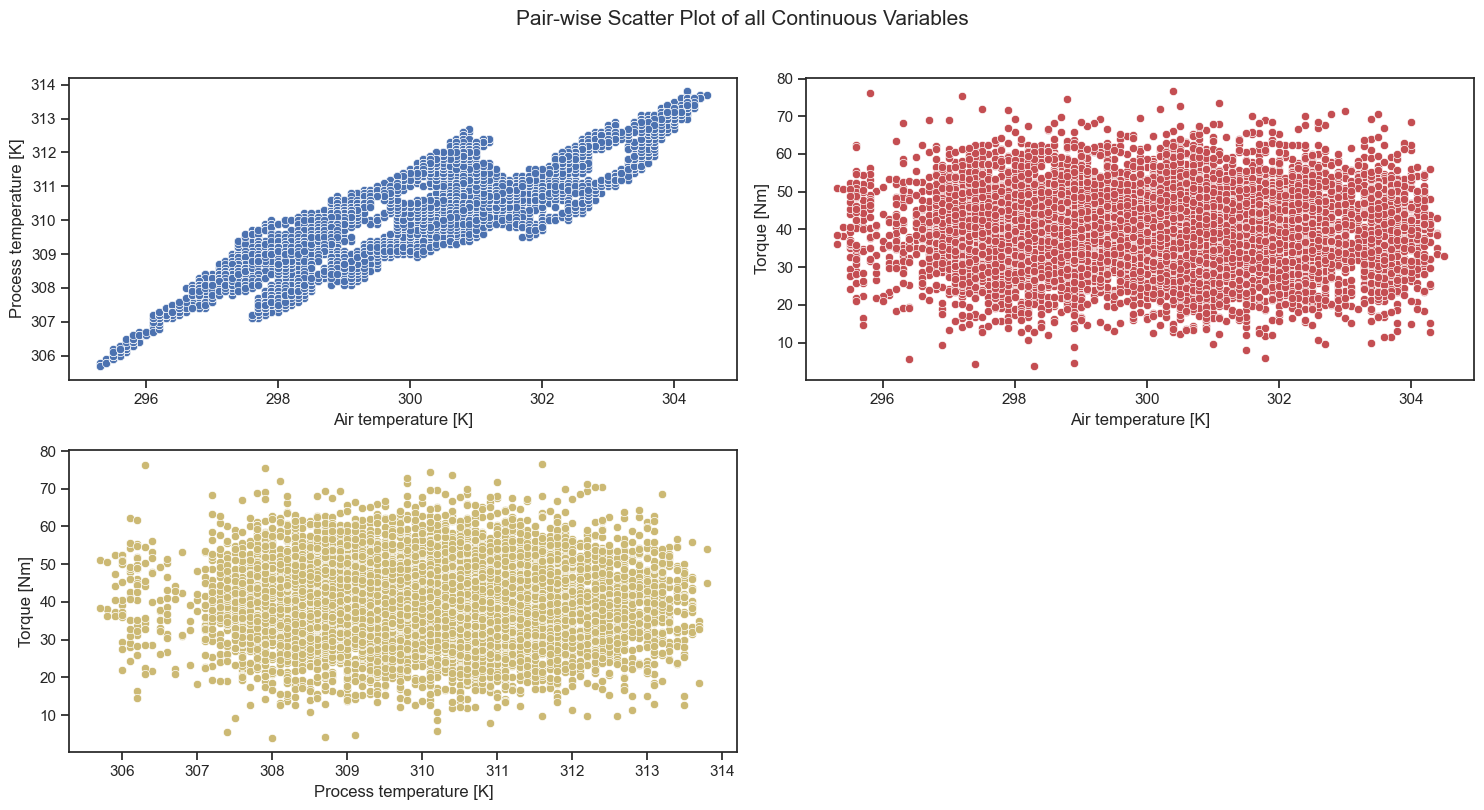

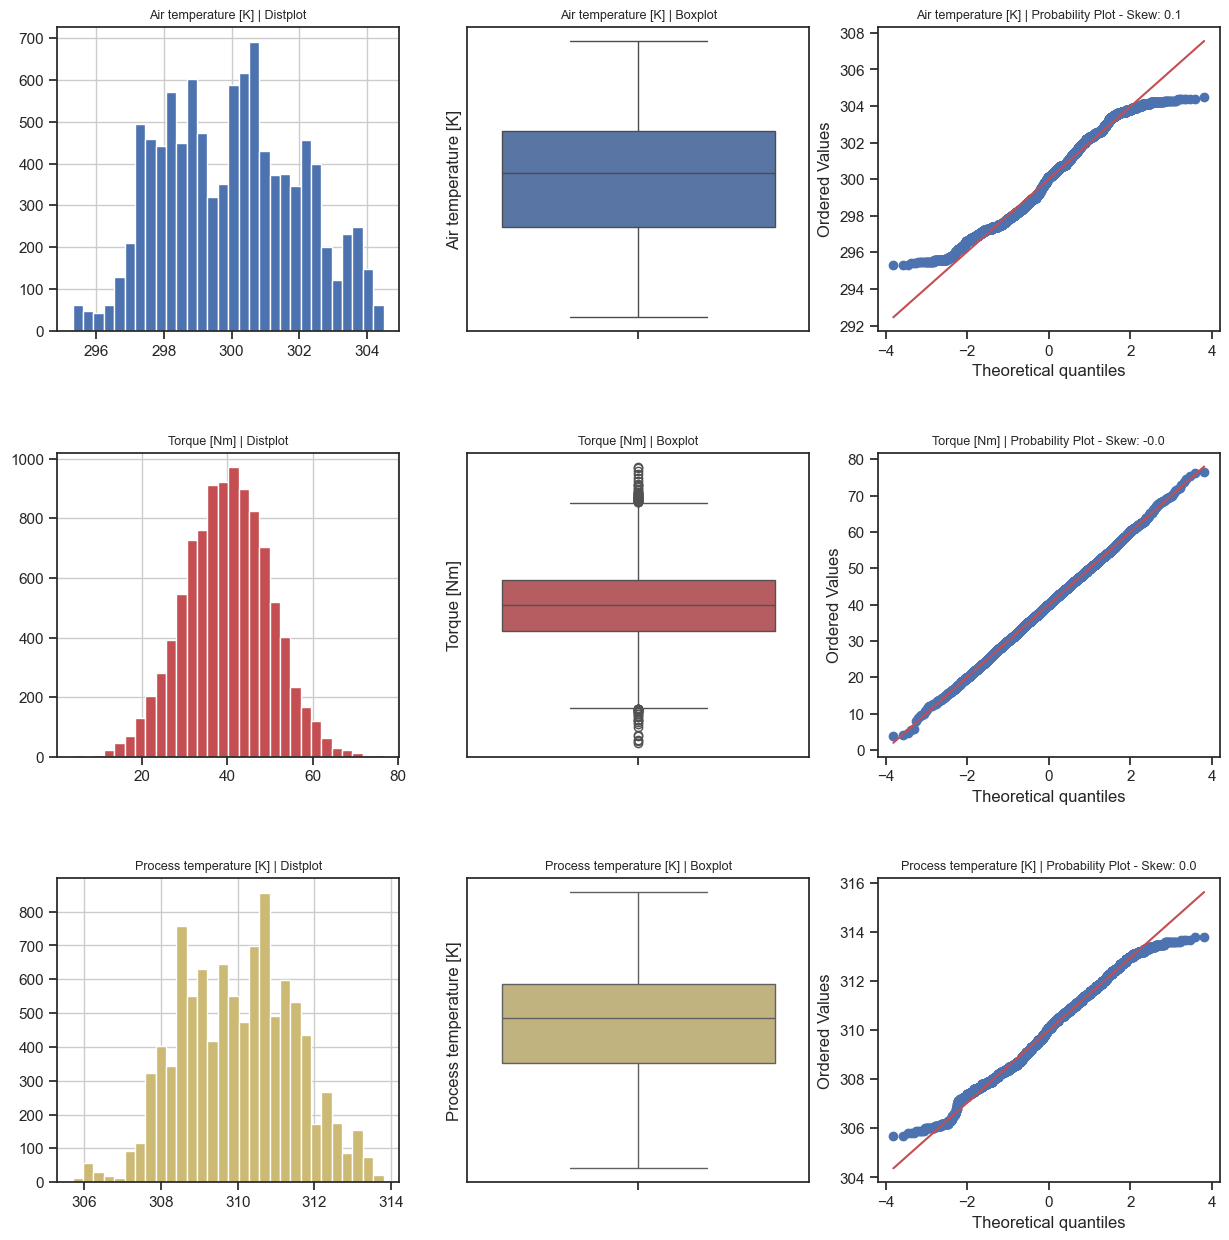

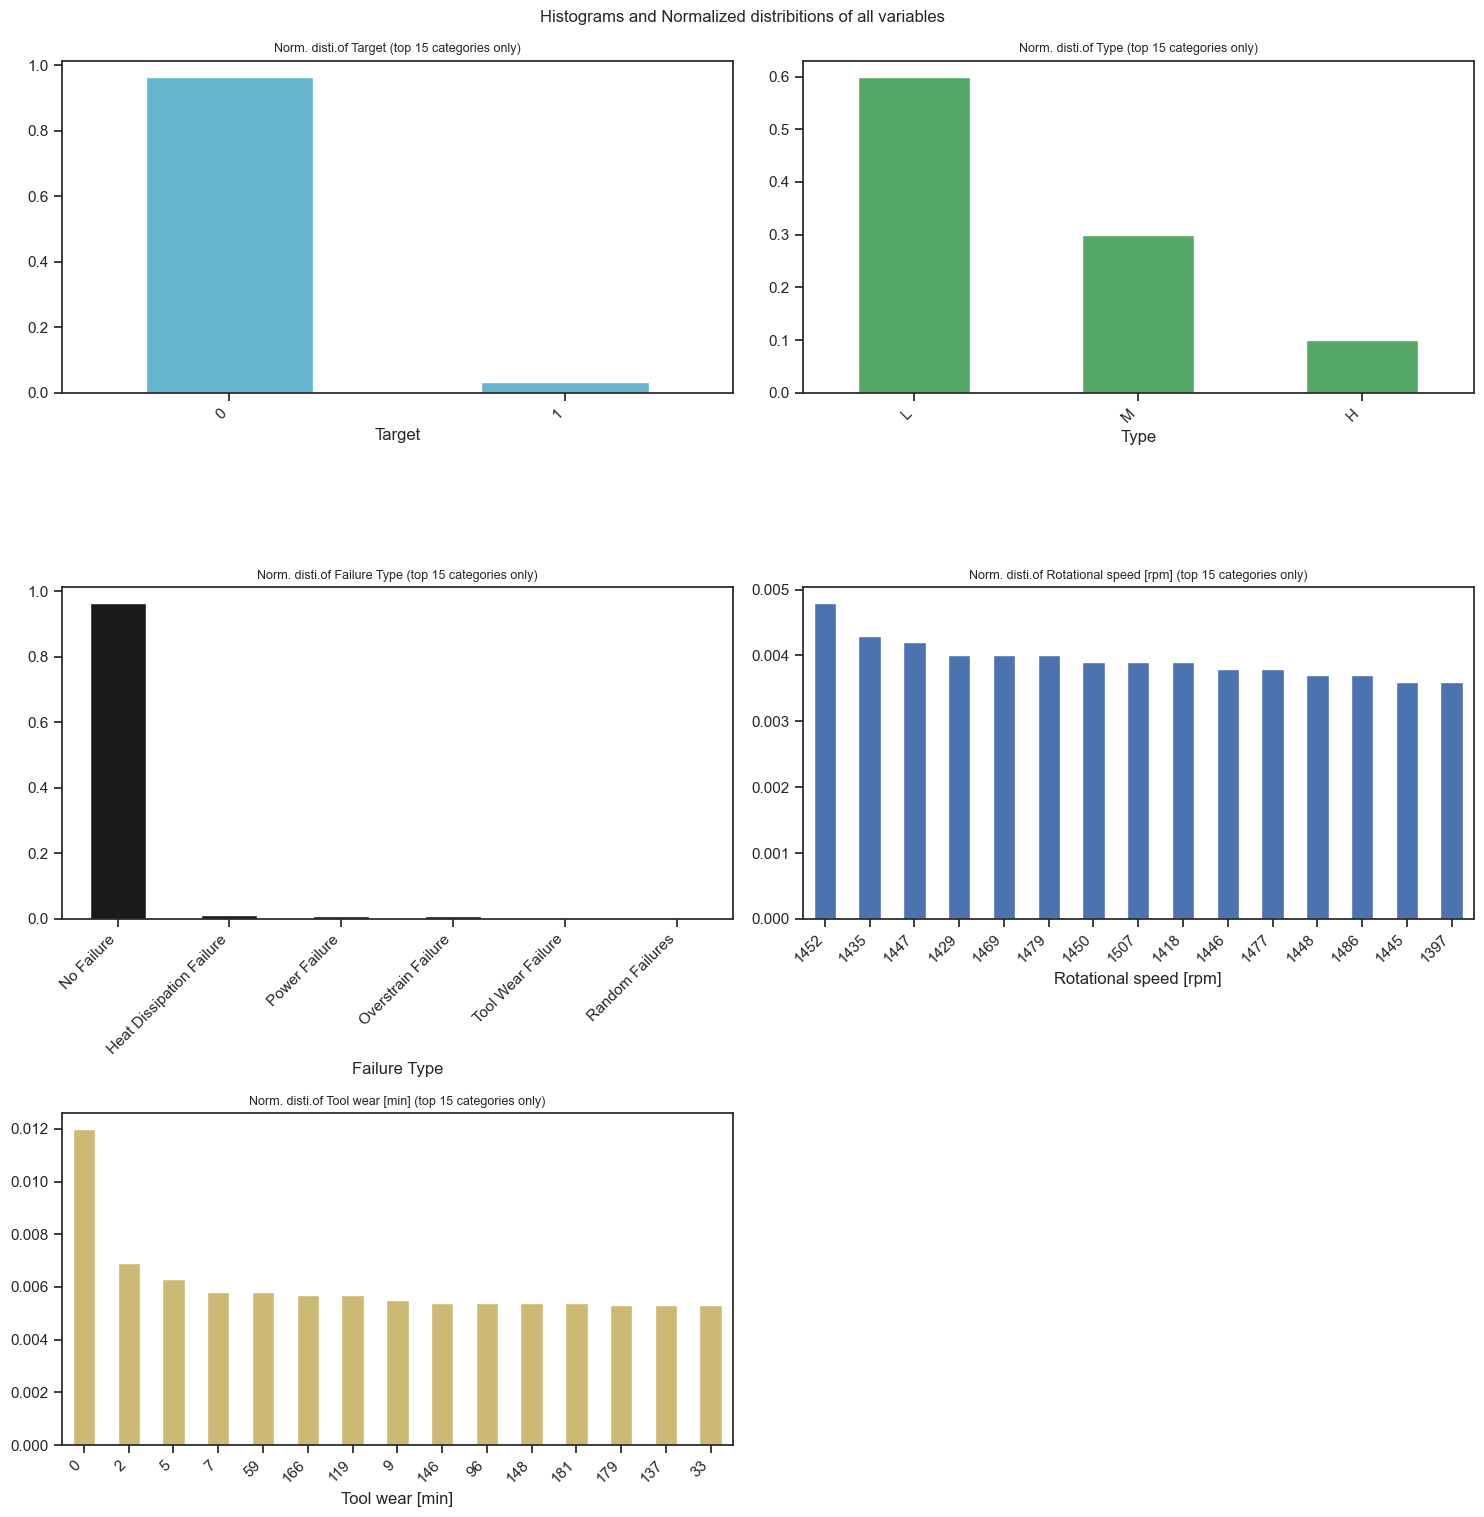

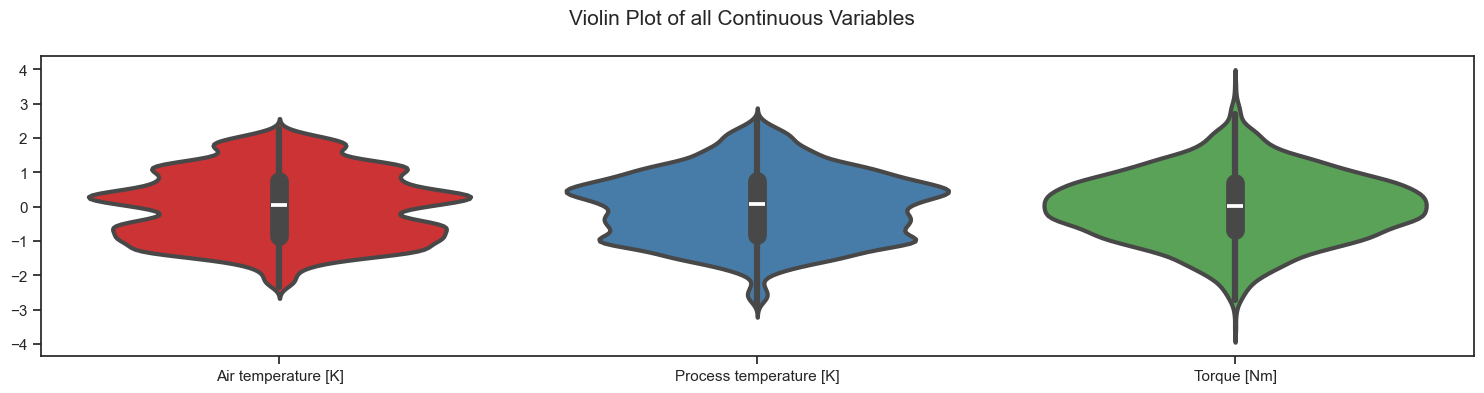

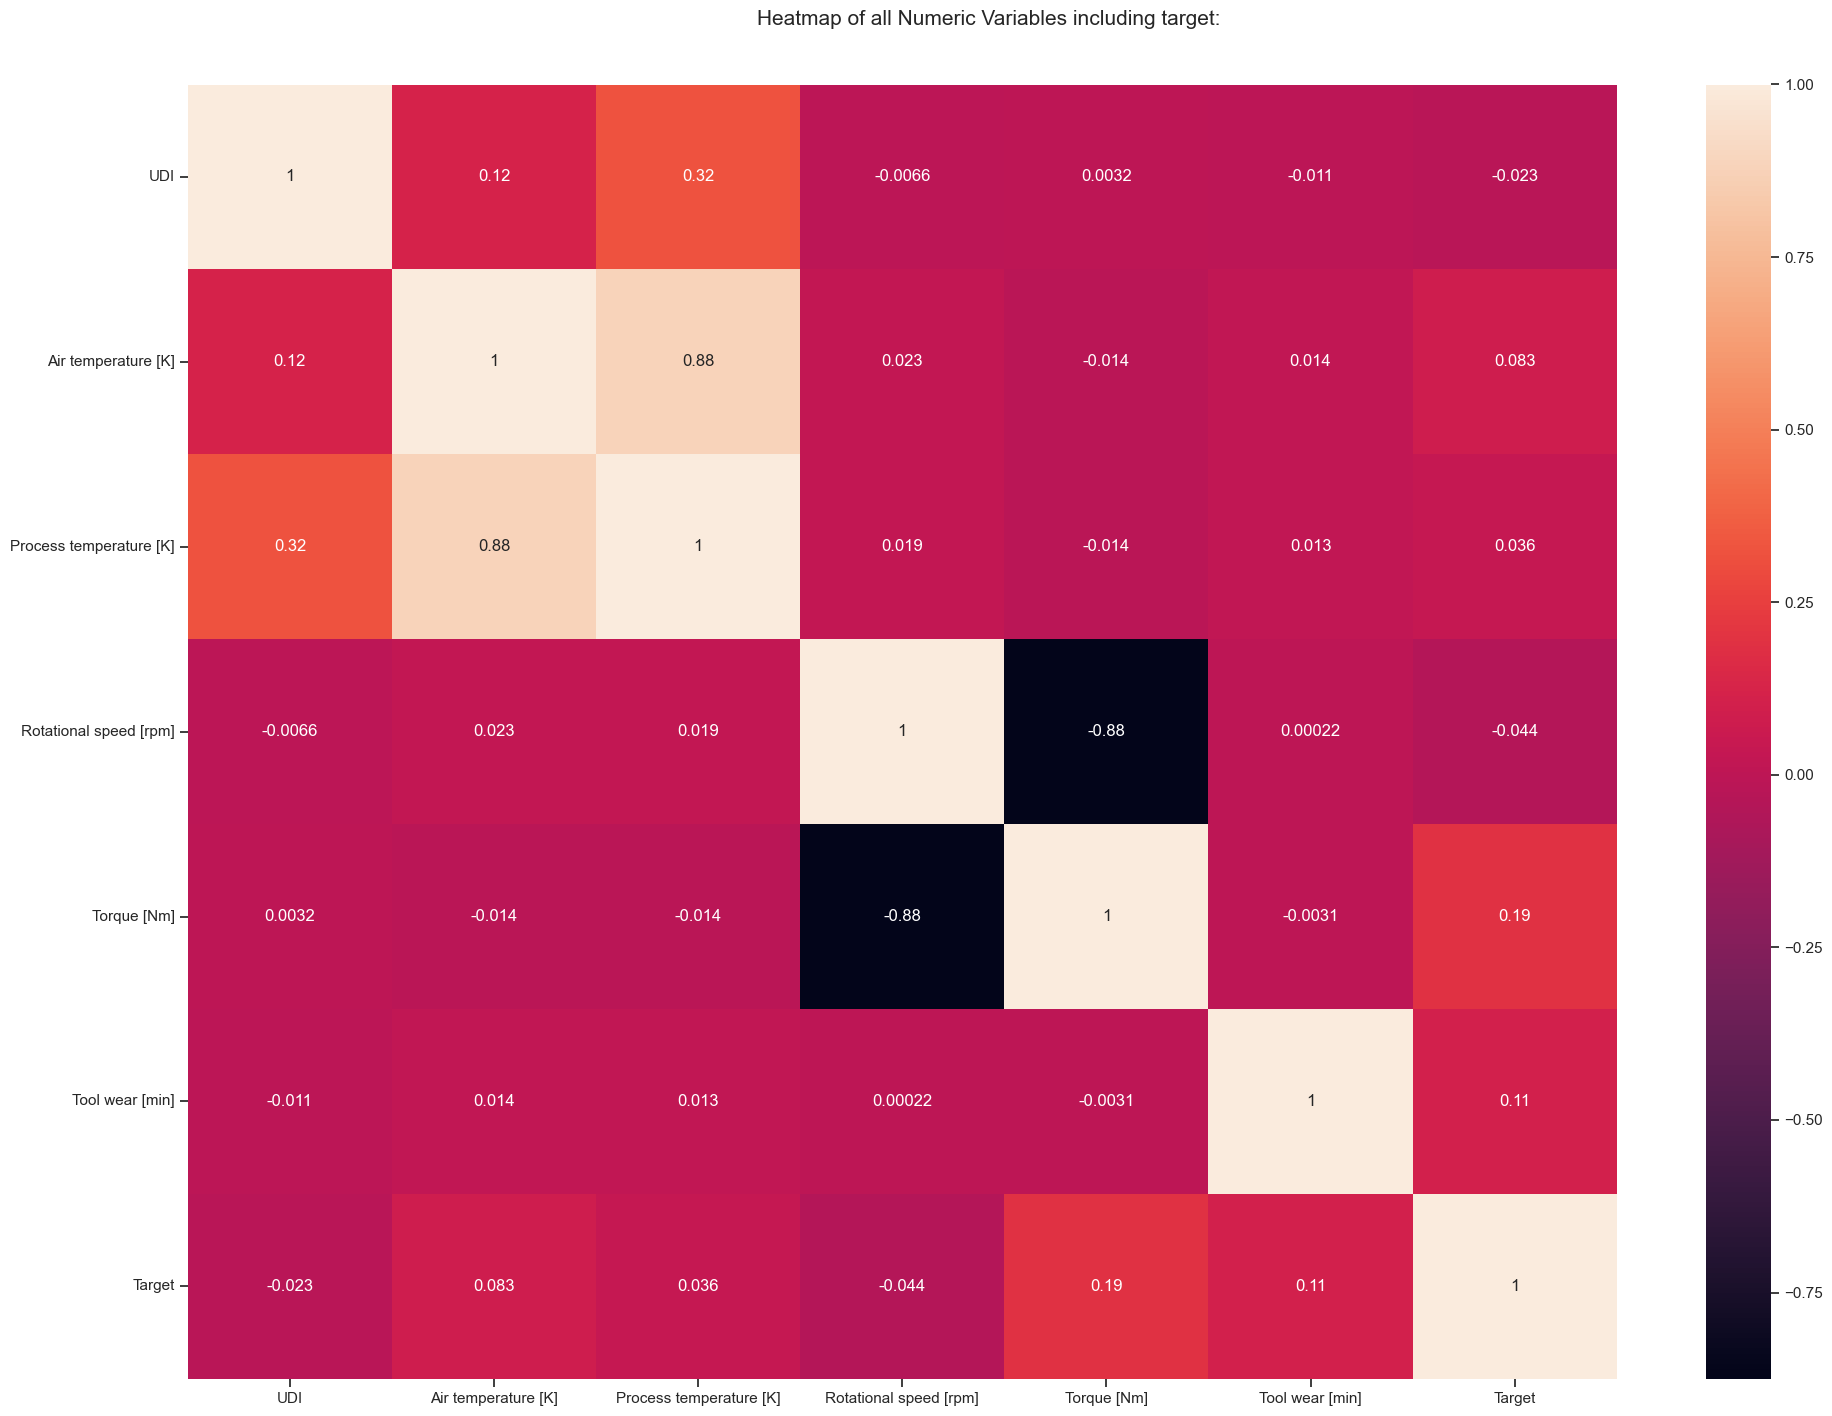

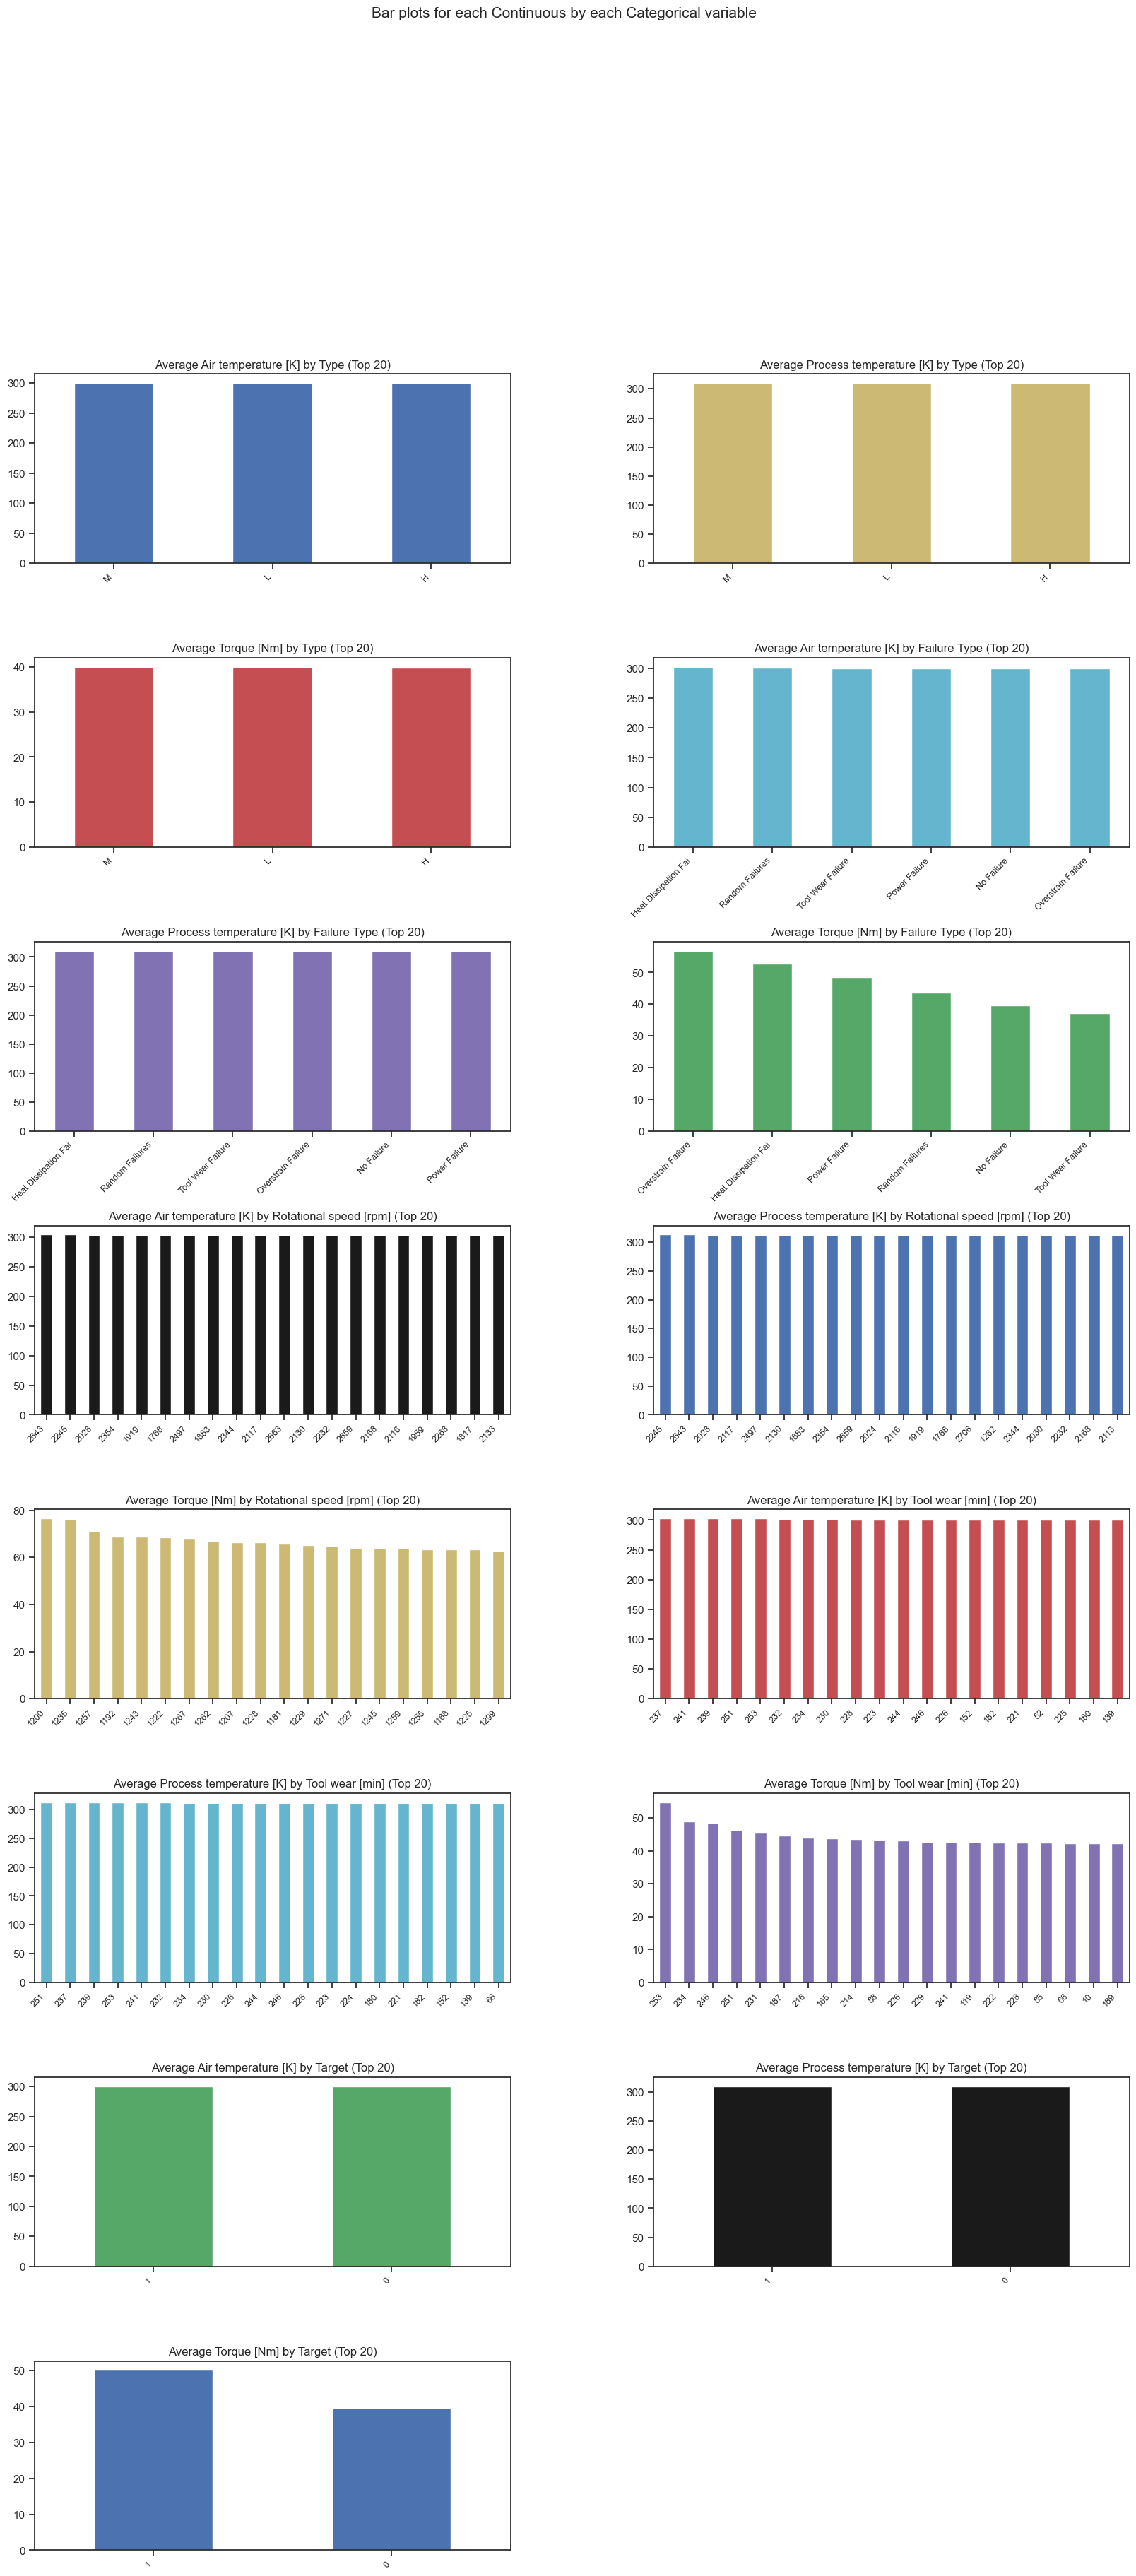

All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [42]:
%matplotlib inline
eda_train = AV.AutoViz(df)

Del análisis vemos como sugerencias que tanto las columnas UDI y Product Id al ser identificadores conviene dropearlas para no "ensuciar" el modelo. Las variables Air temperature y process temperature parecen altamente correlacionadas, al igual que las variables Rotational speed y Torque. Por otro lado se ven outliers para analizar en las variables Rotational speed y torque. Se aprecia desbalance considerable en la variable objetivo

In [43]:
# Define un diccionario de mapeo para convertir los valores
target_mapping = {0: "No", 1: "Sí"}

# Aplica el mapeo a la columna 'Target' usando la función map()
df['Target'] = df['Target'].map(target_mapping)

In [44]:
# Visualizacion del dataframe
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,No,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,No,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,No,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,No,No Failure


Se eliminan las columnas UDI y Product ID siguiendo las sugerencias del EDA realizado anteriormente.

In [45]:
# Dropear las columnas 'UDI' y 'Product ID'
df_v1= df.drop(['UDI', 'Product ID'], axis=1)

# Mostrar el DataFrame después de dropear las columnas
print("\nDataFrame después de dropear 'UDI' y 'Product ID':")
print(df_v1)


DataFrame después de dropear 'UDI' y 'Product ID':
     Type  Air temperature [K]  Process temperature [K]  \
0      M          298.1                  308.6            
1      L          298.2                  308.7            
2      L          298.1                  308.5            
3      L          298.2                  308.6            
4      L          298.2                  308.7            
...   ...                  ...                      ...   
9995   M          298.8                  308.4            
9996   H          298.9                  308.4            
9997   M          299.0                  308.6            
9998   H          299.0                  308.7            
9999   M          299.0                  308.7            

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min] Target Failure Type  
0              1551              42.8             0          No    No Failure   
1              1408              46.3             3          No    No Failure

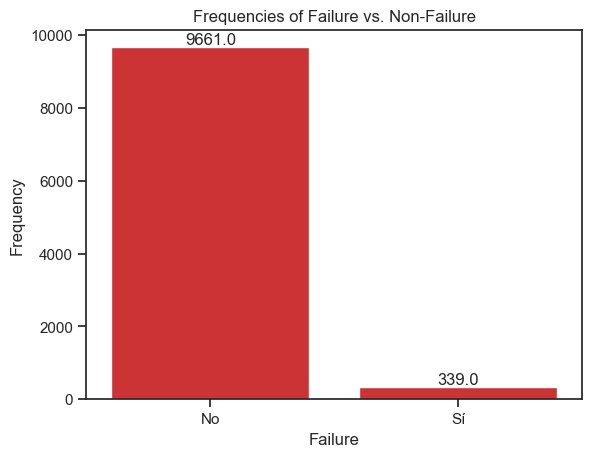

In [46]:
# Create a bar graph of No. of Failures vs Non-Failures
sns.countplot(x='Target', data=df_v1)
plt.xlabel('Failure')
plt.ylabel('Frequency')
plt.title('Frequencies of Failure vs. Non-Failure')

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

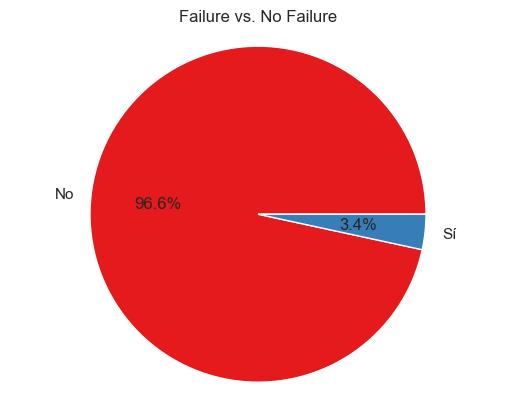

In [47]:
# Create a pie chart of Failures vs No Failures
category_counts = df_v1['Target'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Failure vs. No Failure')
plt.show()

Para tratar el desbalanceo de clases se guarda el dataframe como archivo csv y luego se importa con H2O para su tratamiento.

In [48]:

# Guardar el DataFrame como un archivo CSV
df_v1.to_csv('archivo.csv', index=False)

# Importar el archivo CSV con H2O
data = h2o.import_file('archivo.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [57]:
# Definir las columnas predictoras y la columna objetivo
x = data.columns[:-2]  # Todas las columnas excepto la dos últimas (predictoras)
y = "Target"    # Nombre de la columna objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
train, test = data.split_frame(ratios=[0.7], seed=42)

# Se prepara los datos para un problema de clasificación binaria, donde la variable objetivo 'Target' es categórica
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Entrenar el modelo con H2OAutoML y especificar balance_classes
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=60*2, balance_classes=True)
aml.train(x=x, y=y, training_frame=train)

# Imprimir información sobre los conjuntos de datos
print("Número de filas en conjunto de entrenamiento:", train.nrow)
print("Número de filas en conjunto de prueba:", test.nrow)

AutoML progress: |█
19:09:31.435: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Número de filas en conjunto de entrenamiento: 7022
Número de filas en conjunto de prueba: 2978


In [50]:
# Ranking de los modelos entrenados
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XRT_1_AutoML_2_20240509_190141,0.97359,0.126215,0.755917,0.164103,0.170851,0.02919
GBM_grid_1_AutoML_2_20240509_190141_model_2,0.971333,0.0699328,0.727399,0.203096,0.1396,0.0194882
GBM_1_AutoML_2_20240509_190141,0.970149,0.0762262,0.752513,0.15859,0.144224,0.0208005
GBM_2_AutoML_2_20240509_190141,0.968888,0.0858765,0.732902,0.164398,0.147057,0.0216259
GBM_grid_1_AutoML_2_20240509_190141_model_3,0.964793,0.0813962,0.684792,0.208074,0.150375,0.0226127
GBM_3_AutoML_2_20240509_190141,0.964317,0.0924685,0.748523,0.148542,0.149554,0.0223663
GBM_4_AutoML_2_20240509_190141,0.964151,0.0983843,0.716054,0.155603,0.157844,0.0249147
GBM_grid_1_AutoML_2_20240509_190141_model_5,0.961117,0.0804665,0.781889,0.166869,0.127669,0.0162994
DRF_1_AutoML_2_20240509_190141,0.960023,0.156375,0.751011,0.154202,0.169014,0.0285658
GBM_5_AutoML_2_20240509_190141,0.958358,0.0877401,0.68433,0.16884,0.149225,0.022268


In [51]:
# Descripcion de todos los modelos entrenados
#exa = aml.explain(test)

In [52]:
# Obtener el mejor modelo
best_model = aml.leader
best_model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_2_20240509_190141


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          146718                 16           20           18.88         177           271           228.82

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.06356105894946724
RMSE: 0.2521131867821817
LogLoss: 0.1700716905420076
Mean Per-Class Error: 0.00154832465195848
AUC: 0.9999513942221437
AUCPR: 0.9999491479968063
Gini: 0.9999027884442875

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.05835764902042519
       No    Sí    Error    Rate
-----  ----  ----  -------  --------------
No     6763  19    0.0028   (19.0/6782.0)
Sí     2     6775  0.0003   (2.0/6777.0)
Total  6765  6794  0.0015   (21.0/13559.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0583576    0.998453  355
max f2                       0.0533683    0.999233  357
max f0point5                 0.081614     0.998316  347
max accuracy                 0.0583576    0.998451  355
max precision                1            1         0
max recall                   0.0533683    1         357
max specificity              1            1         0
max absolute_mcc             0.0583576    0.996906  355
max min_per_class_accuracy   0.0762155    0.998229  349
max mean_per_class_accuracy  0.0583576    0.998452  355
max tns                      1            6782      0
max fns                      1            3081      0
max fps                      1.22906e-07  6782      399
max tps                      0.0533683    6777      357
max tnr                      1            1         0
max fnr                      1            0.454626  0
max fpr                      1.22906e-07  1         399
max tpr                      0.0533683    1         357

Gains/Lift Table: Avg response rate: 49.98 %, avg score: 40.58 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.272586                    1                  2.00074     2.00074            1                1          1                           1                   0.545374        0.545374                   100.074   100.074            0.545374
2        0.300317                    0.975387           2.00074     2.00074            1                0.982536   1                           0.998387            0.0554818       0.600856                   100.074   100.074            0.600856
3        0.400103                    0.402223           2.00074     2.00074            1                0.791468   1                           0.946781            0.199646        0.800502                   100.074   100.074            0.800502
4        0.500037                    0.0727145          1.97859     1.99631            0.98893          0.264819   0.997788                    0.810489            0.197728        0.998229                   97.8589   99.6311            0.996018
5        1                           0                  0.00354165  1                  0.00177017       0.0011338  0.499816                    0

El modelo de Gradient Boosting Machine (GBM) que hemos desarrollado utilizando H2OAutoM resulta muy prometedor, pero hay aspectos clave que debemos considerar:

Rendimiento en Entrenamiento: El modelo ha demostrado una capacidad excepcional para predecir correctamente nuestras categorías objetivo, con métricas casi perfectas como un AUC de casi 1.0 y errores muy bajos. Esto indica que el modelo puede capturar con precisión las relaciones en nuestros datos de entrenamiento.

Rendimiento en Validación Cruzada: Al aplicar la validación cruzada, que es esencial para probar la robustez del modelo, observamos una disminución en la precisión. Aunque el AUC sigue siendo alto (0.974), hay un aumento notable en el error de clasificación por clase, especialmente en la clase minoritaria.

Consideraciones: Estos resultados sugieren que, aunque nuestro modelo es extremadamente preciso con los datos que ha visto durante el entrenamiento, su capacidad para generalizar a nuevos datos podría mejorar. Esto es indicativo de un posible sobreajuste, donde el modelo aprende demasiado bien las particularidades de los datos de entrenamiento, pero no necesariamente la tendencia general que se aplicaría a nuevos datos.

Conclusión: El modelo GBM es fuerte y muestra un gran potencial. Sin embargo, habría que explorar estrategias para mejorar su generalización, como ajustar la complejidad del modelo o aumentar la diversidad de los datos de entrenamiento, antes de proceder a una implementación completa.

In [53]:
# Realizar predicciones sobre el conjunto de datos de prueba con el mejor modelo
predictions = best_model.predict(test)

# Obtener la métrica de evaluación del mejor modelo en el conjunto de datos de prueba
performance = best_model.model_performance(test_data=test)

# Mostrar la métrica de evaluación del mejor modelo
print(performance)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.02819293585770839
RMSE: 0.16790752174250084
LogLoss: 0.11788513947310027
Mean Per-Class Error: 0.17328021444033948
AUC: 0.976368407941871
AUCPR: 0.7946138253152778
Gini: 0.9527368158837419

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.03991352070513887
       No    Sí    Error    Rate
-----  ----  ----  -------  -------------
No     2870  9     0.0031   (9.0/2879.0)
Sí     34    65    0.3434   (34.0/99.0)
Total  2904  74    0.0144   (43.0/2978.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0399135    0.751445  51
max f2                       0.00771382   0.747029  124
max f0point5                 0.0399135    0.822785  51
max accuracy                 0.03991

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

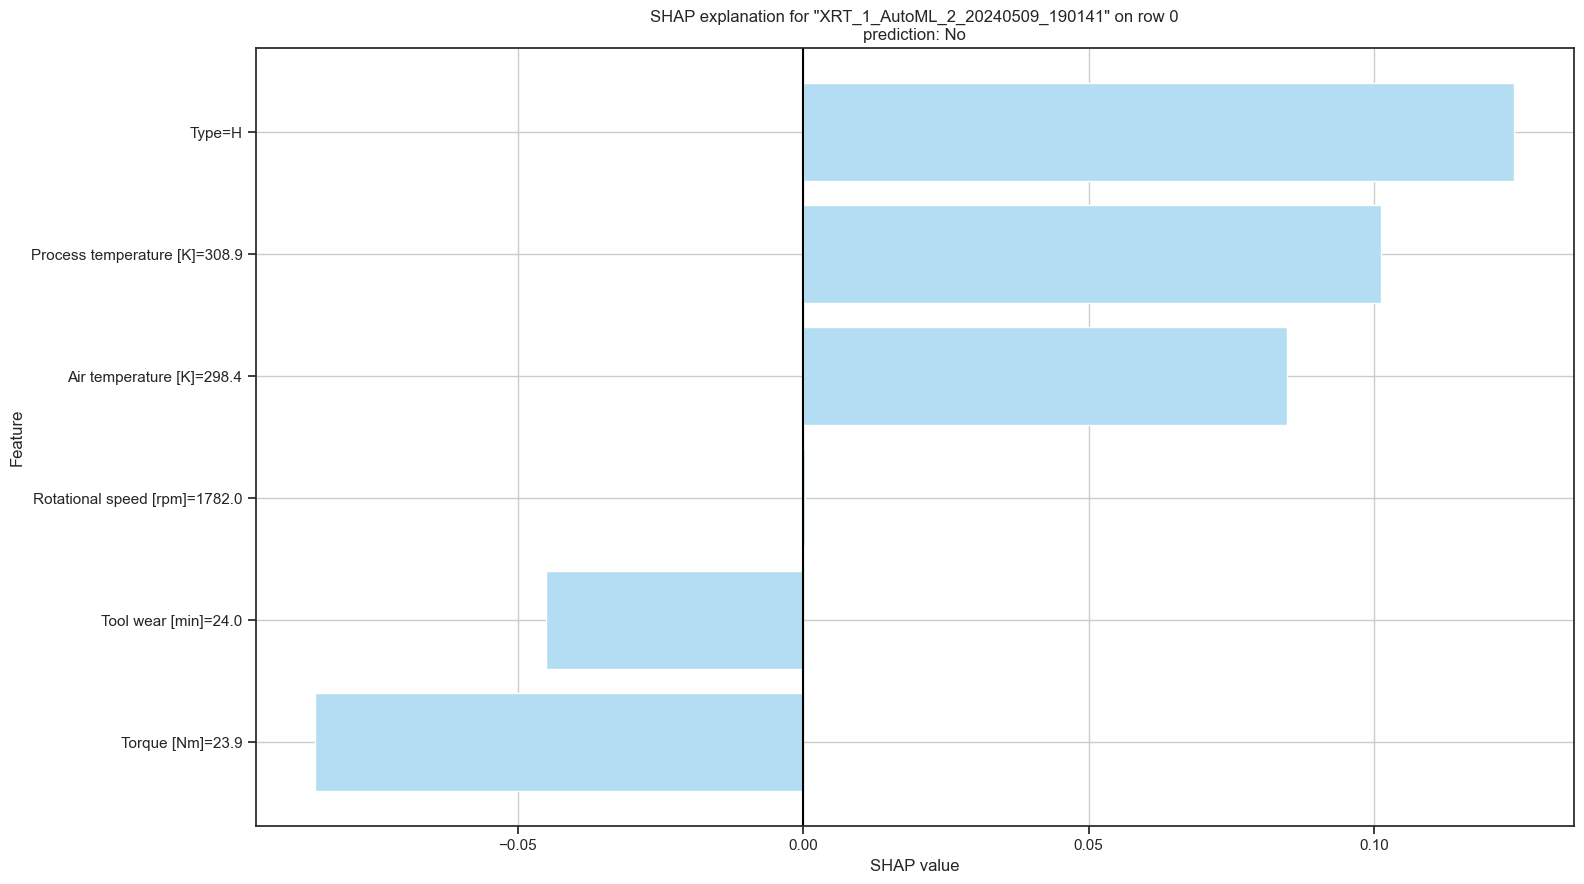

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

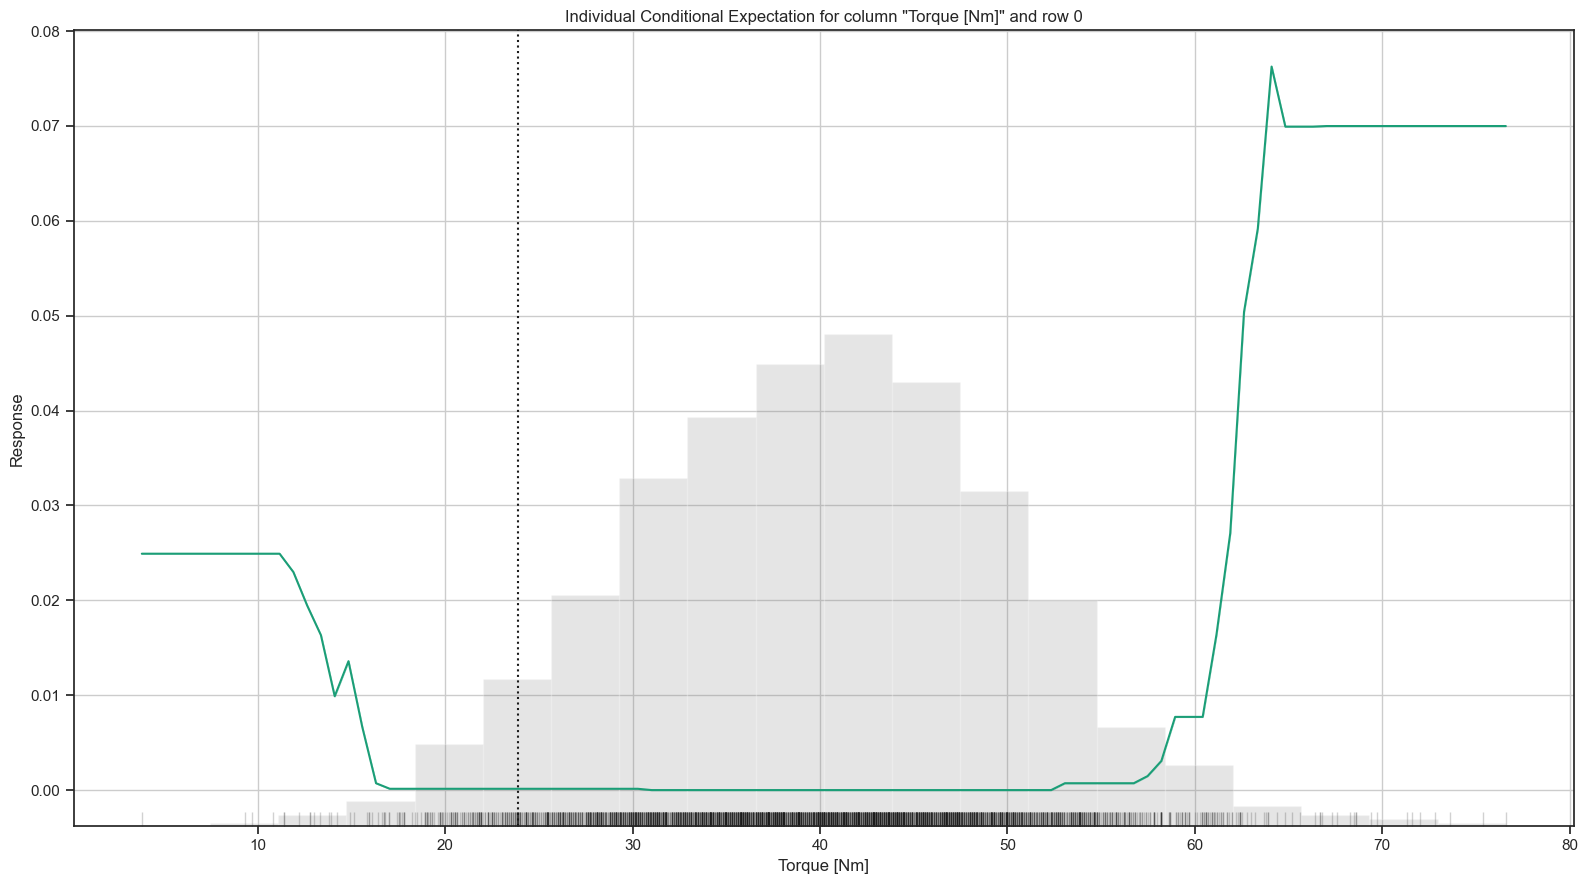

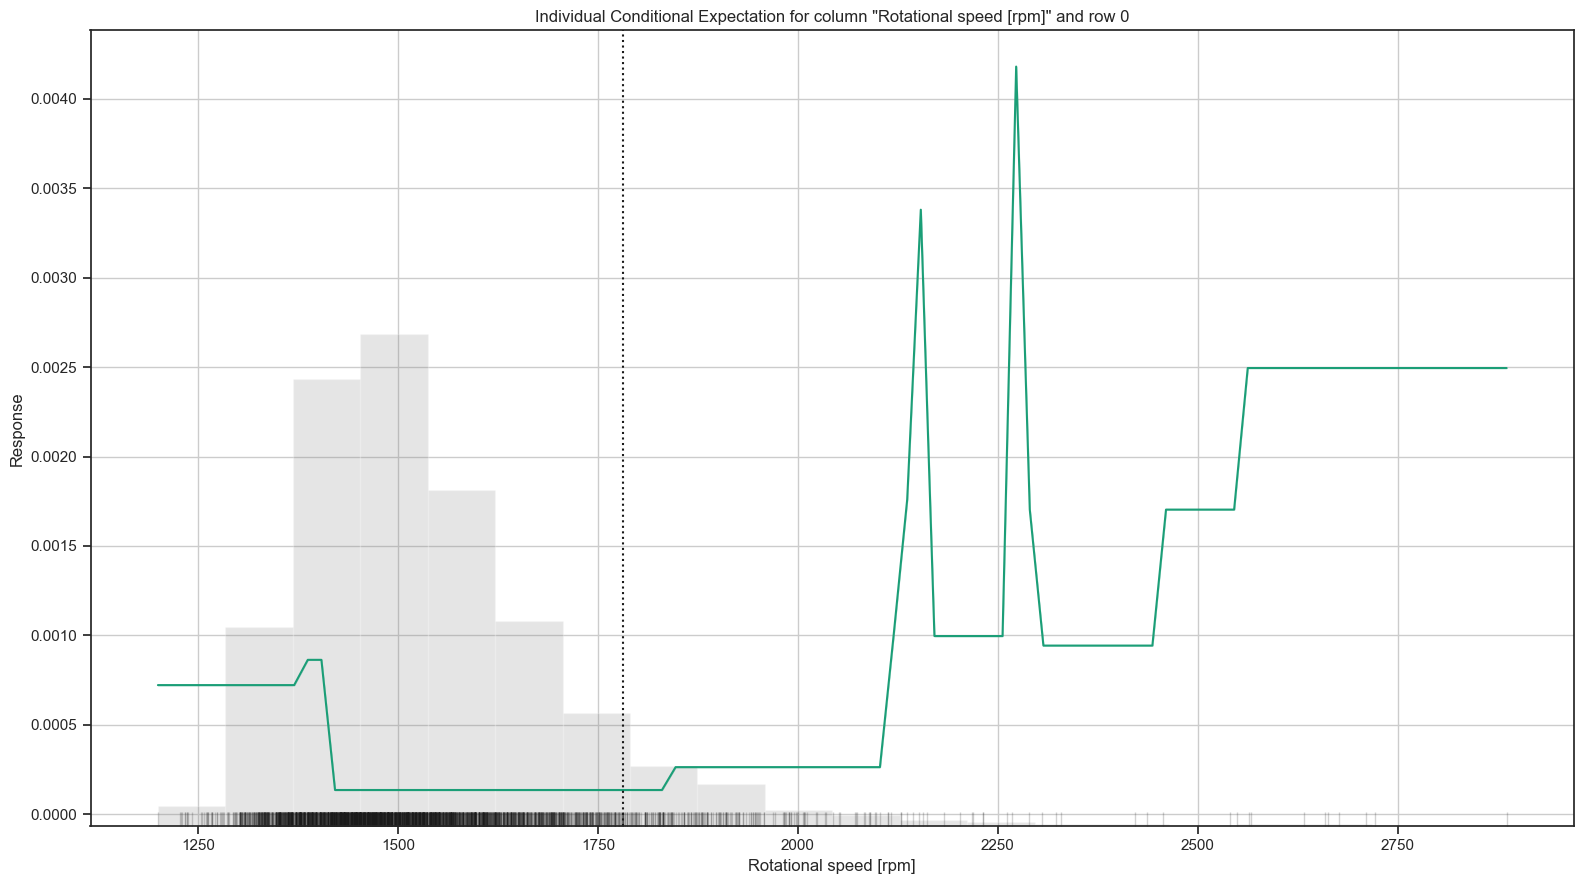

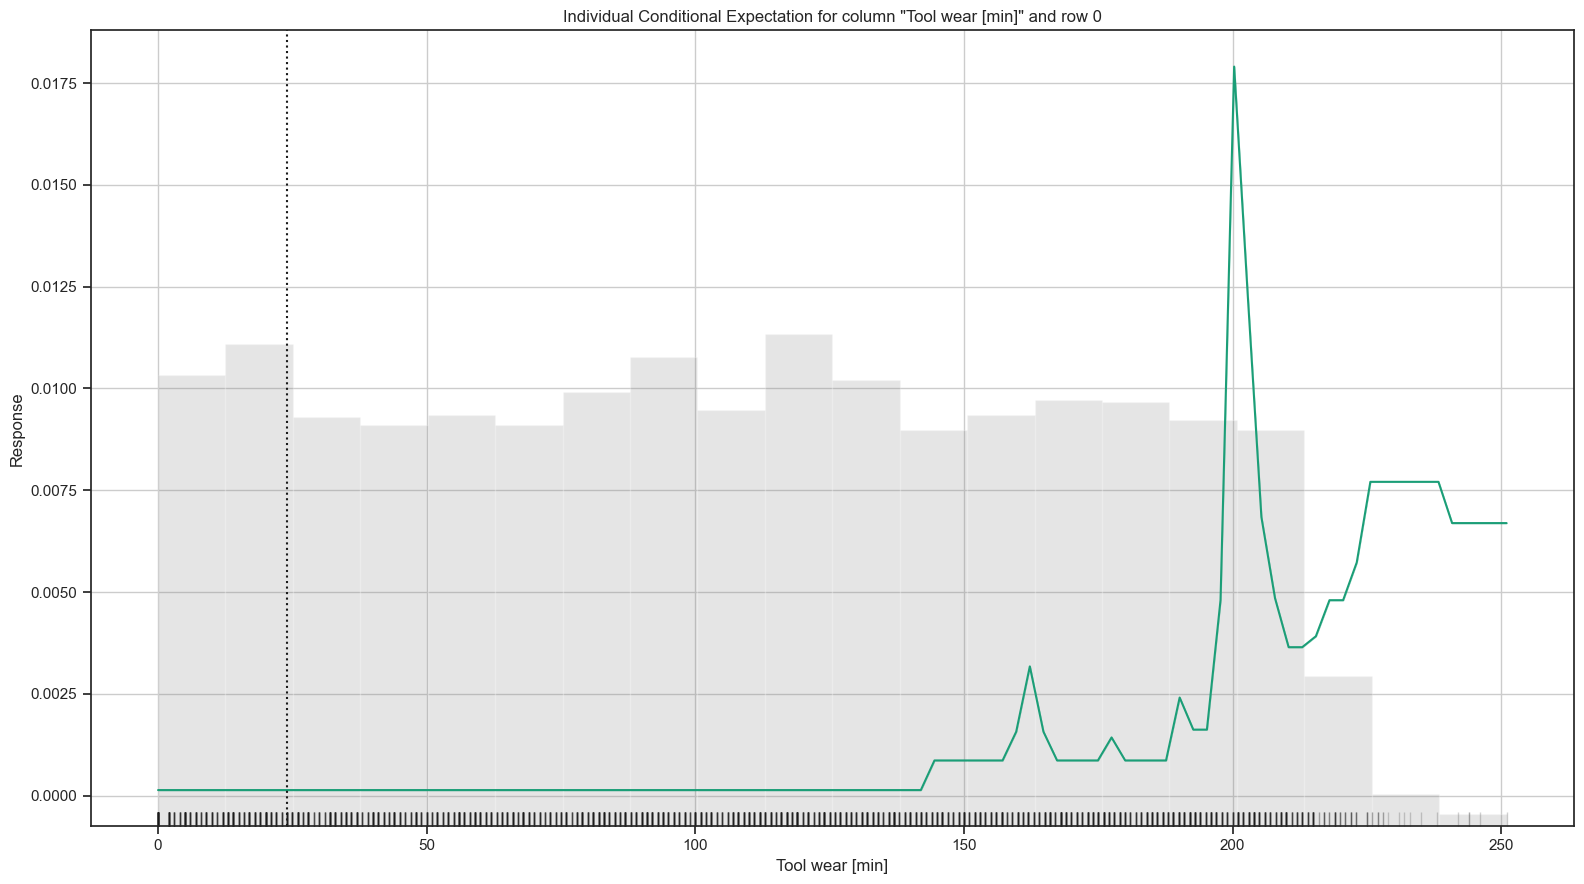

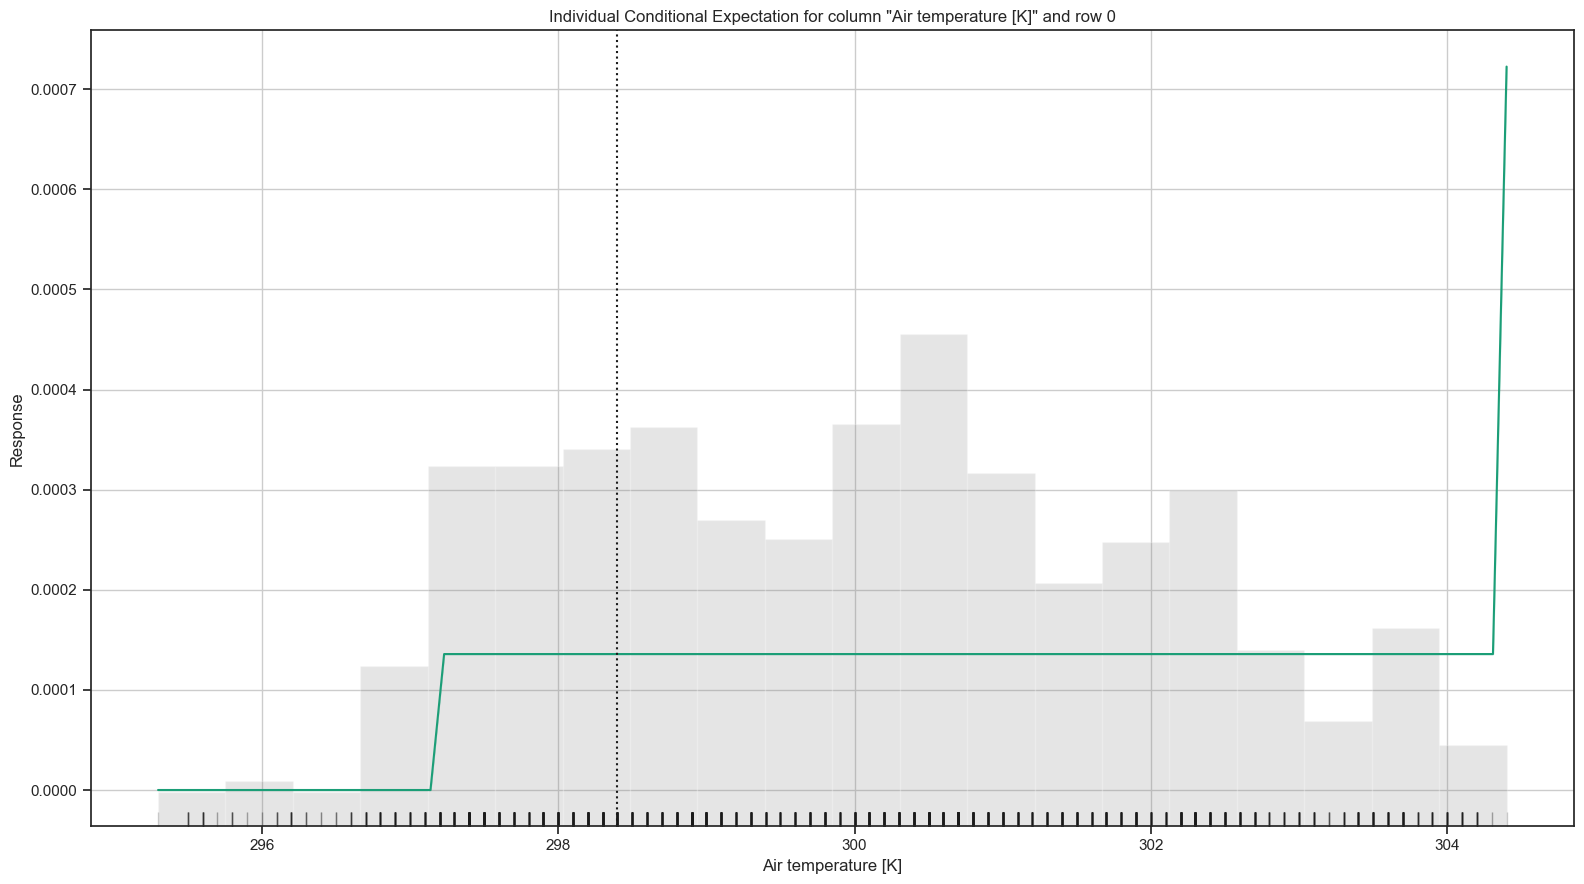

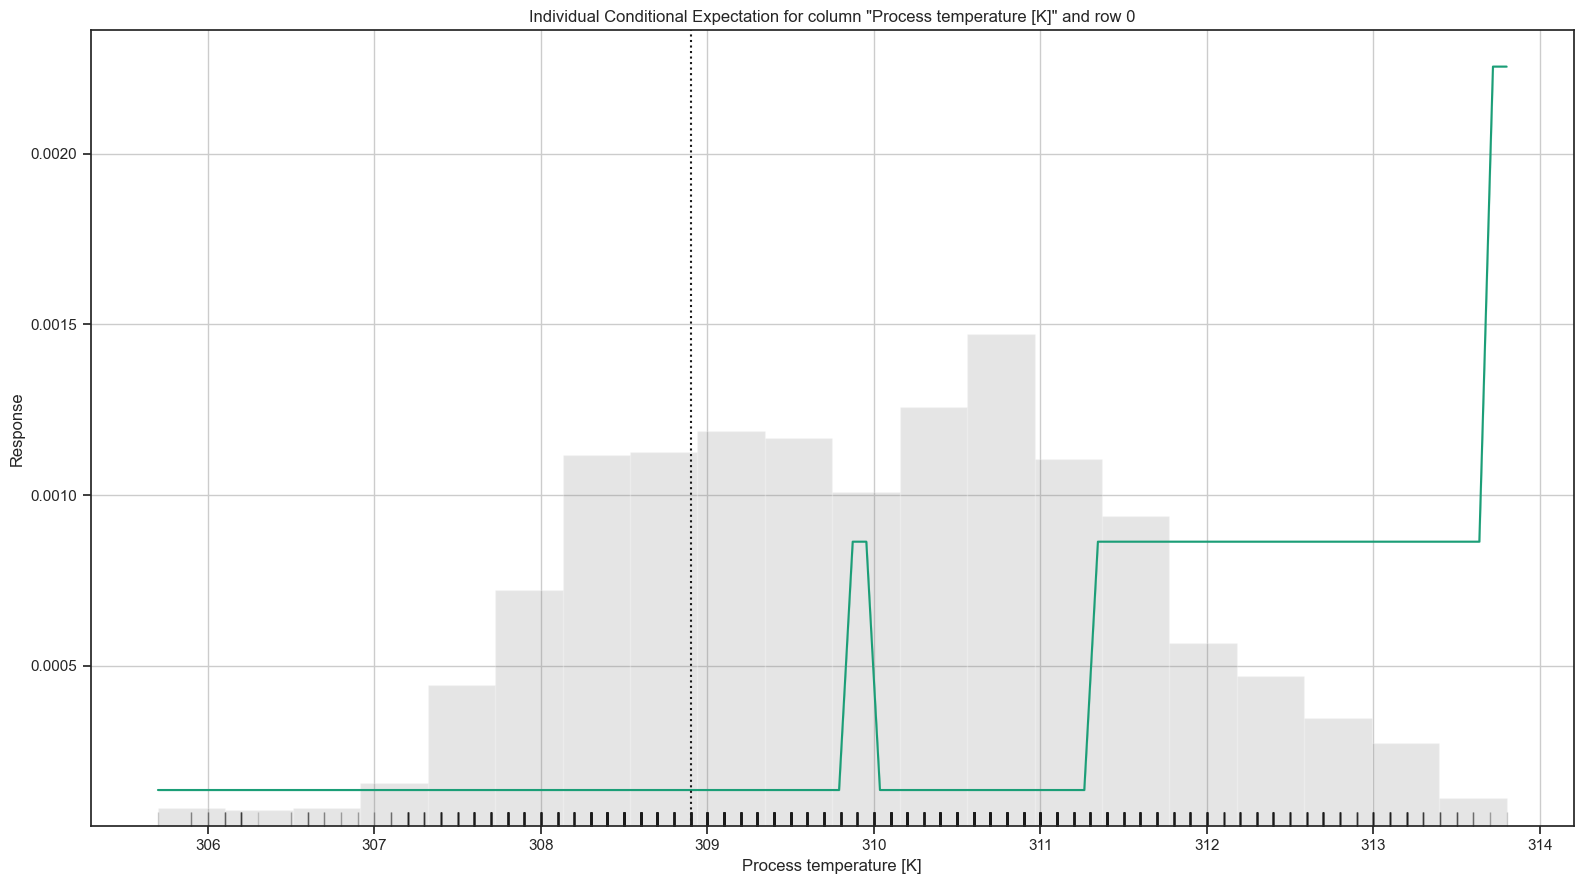

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

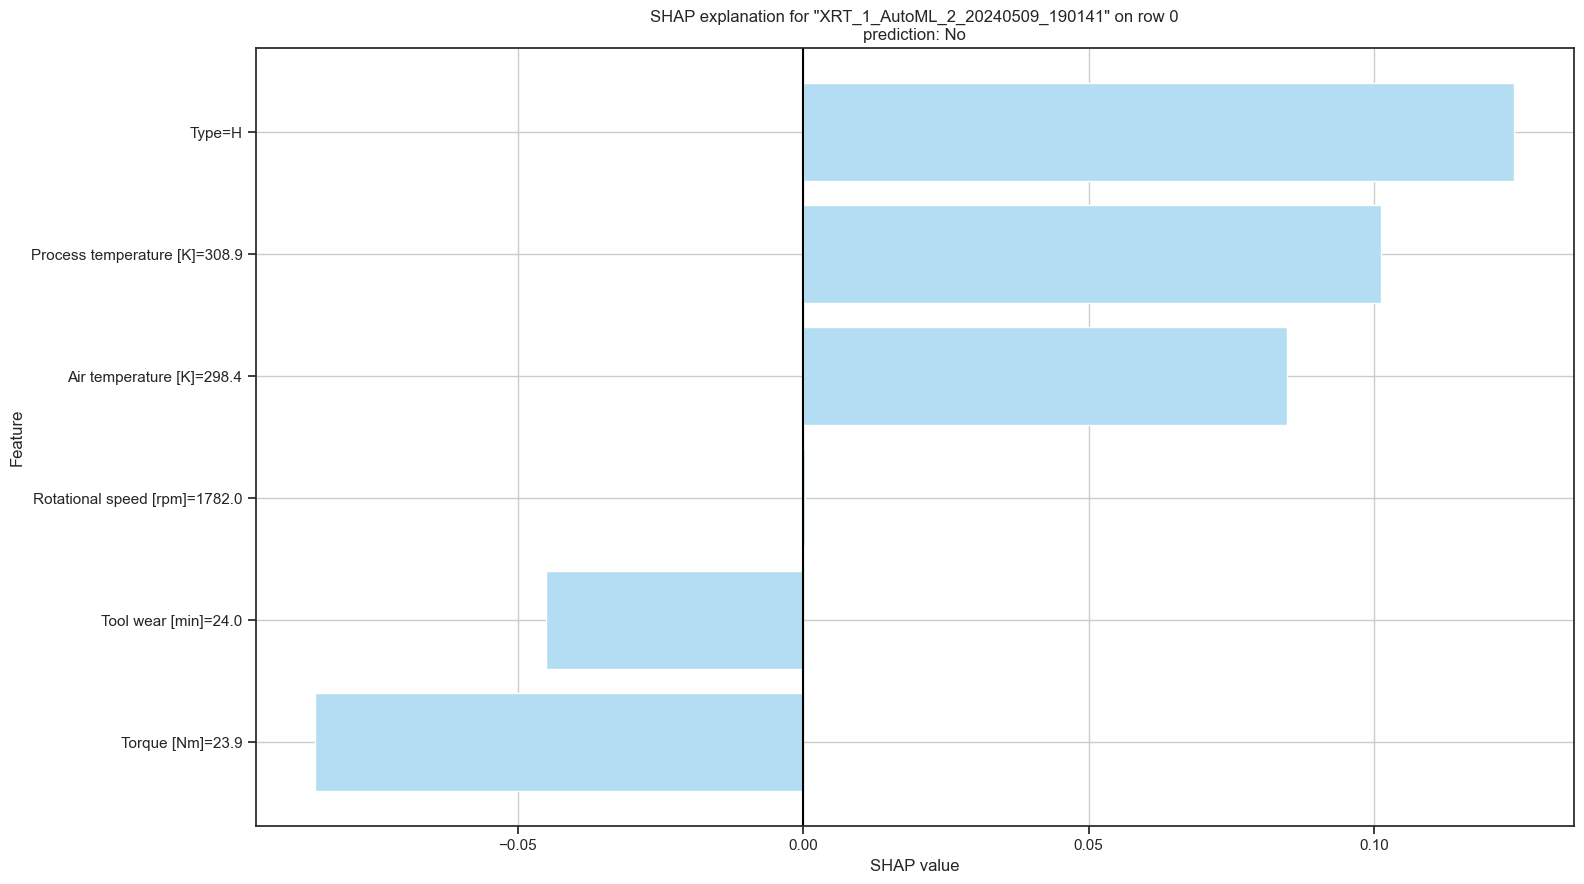

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

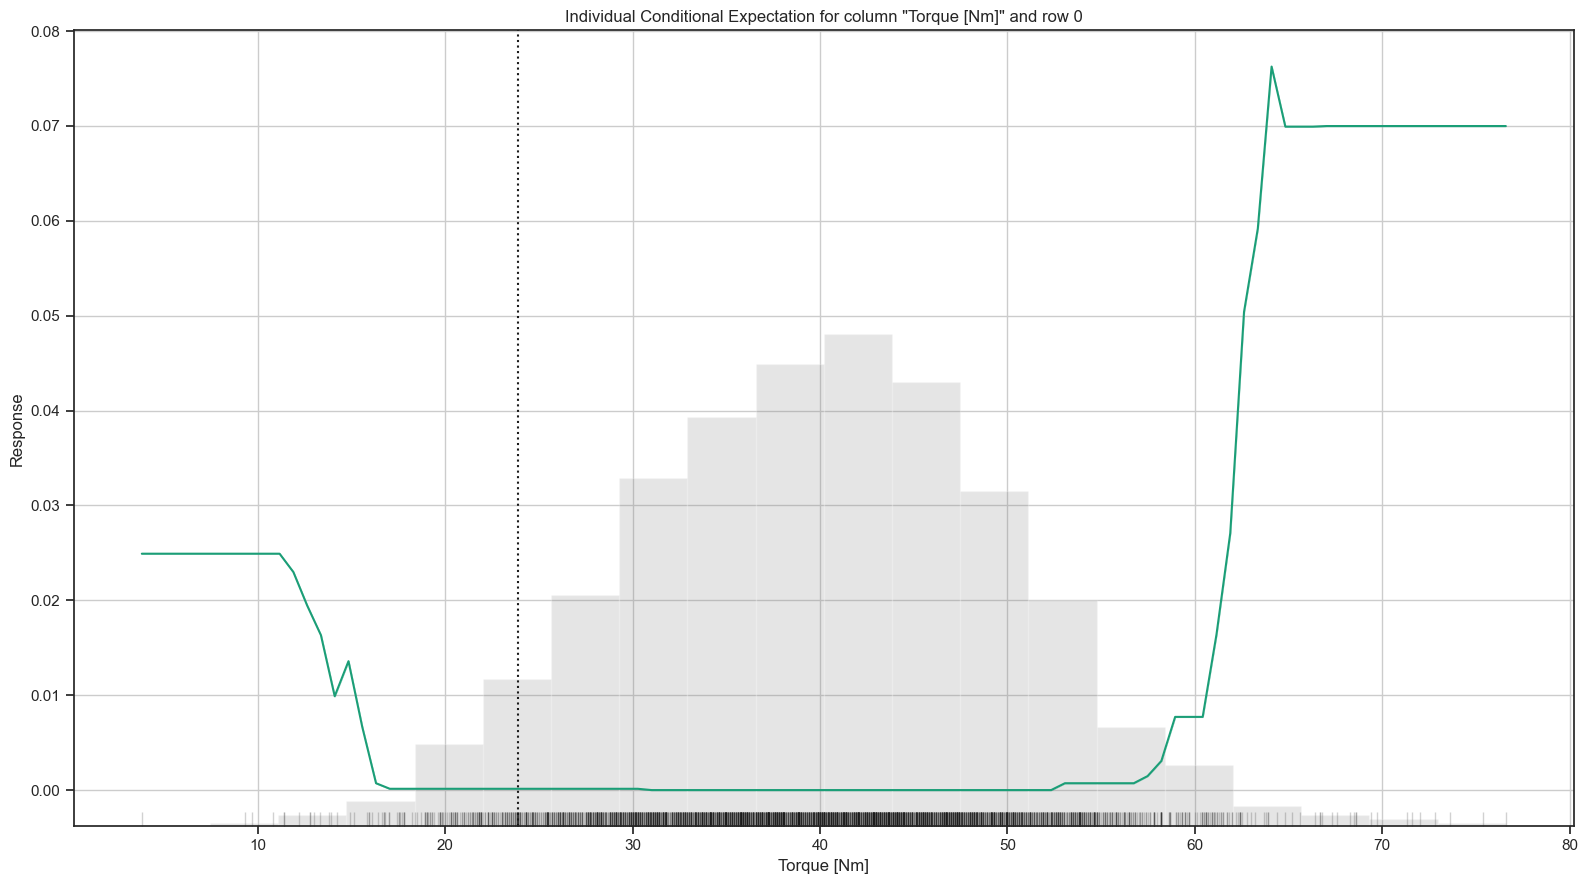

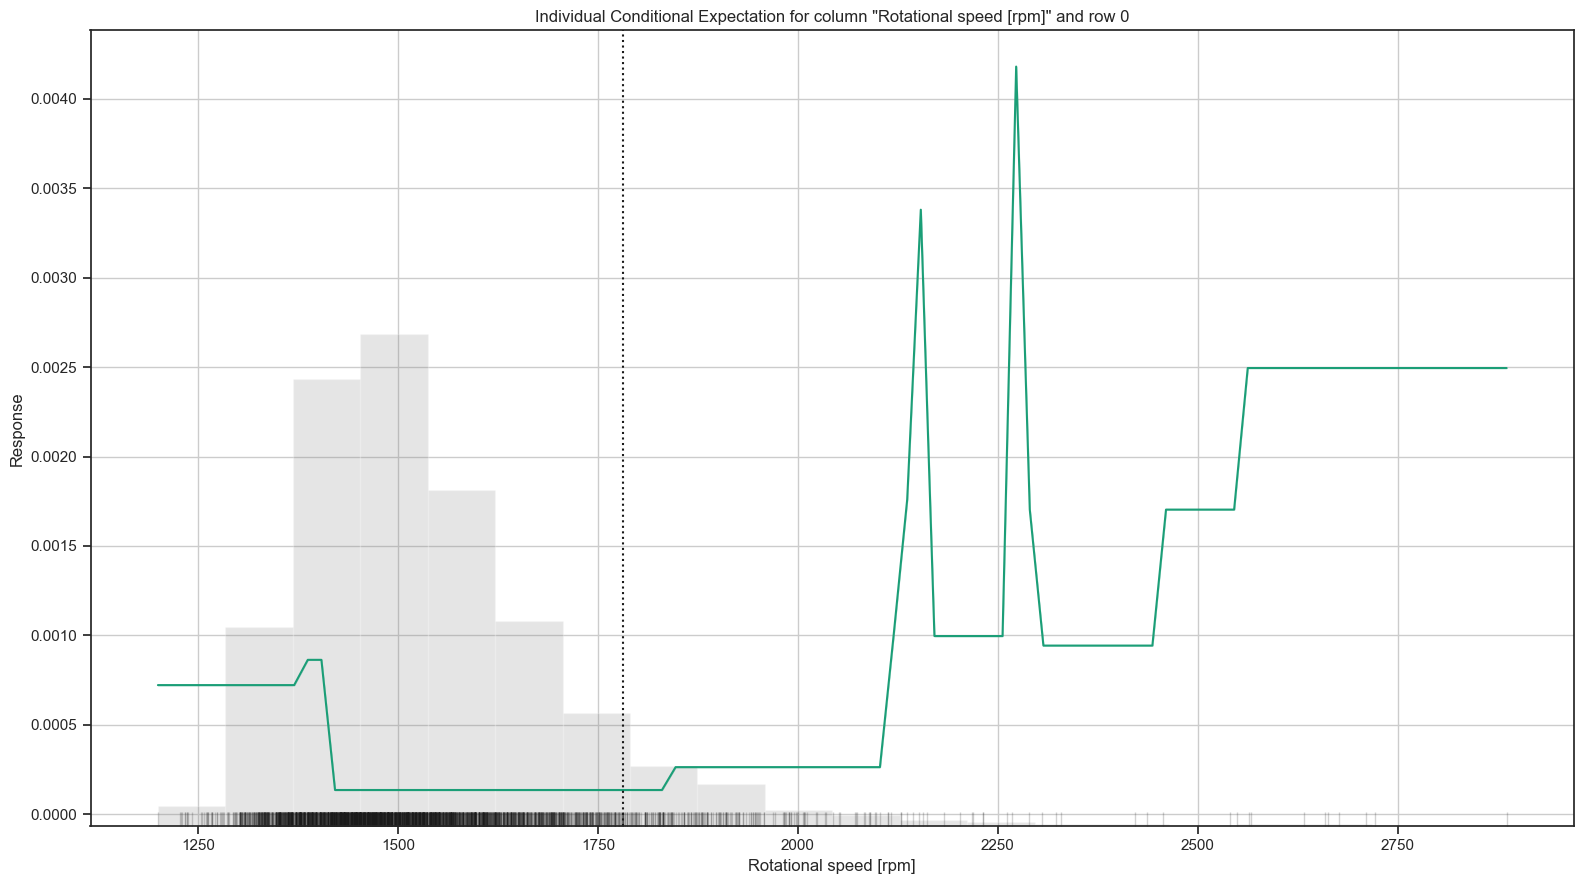

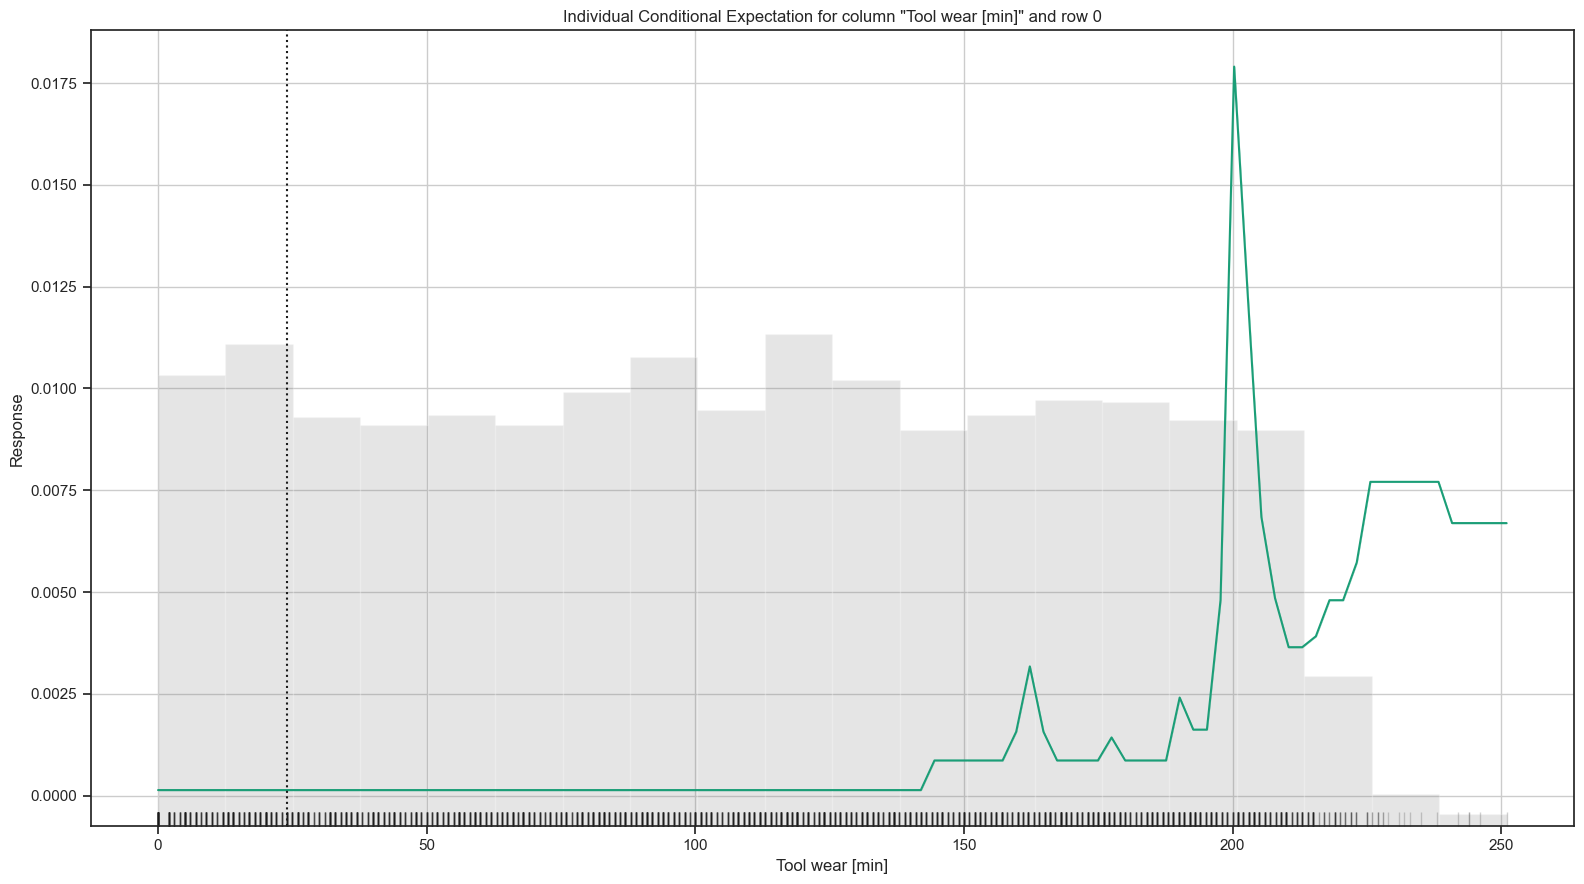

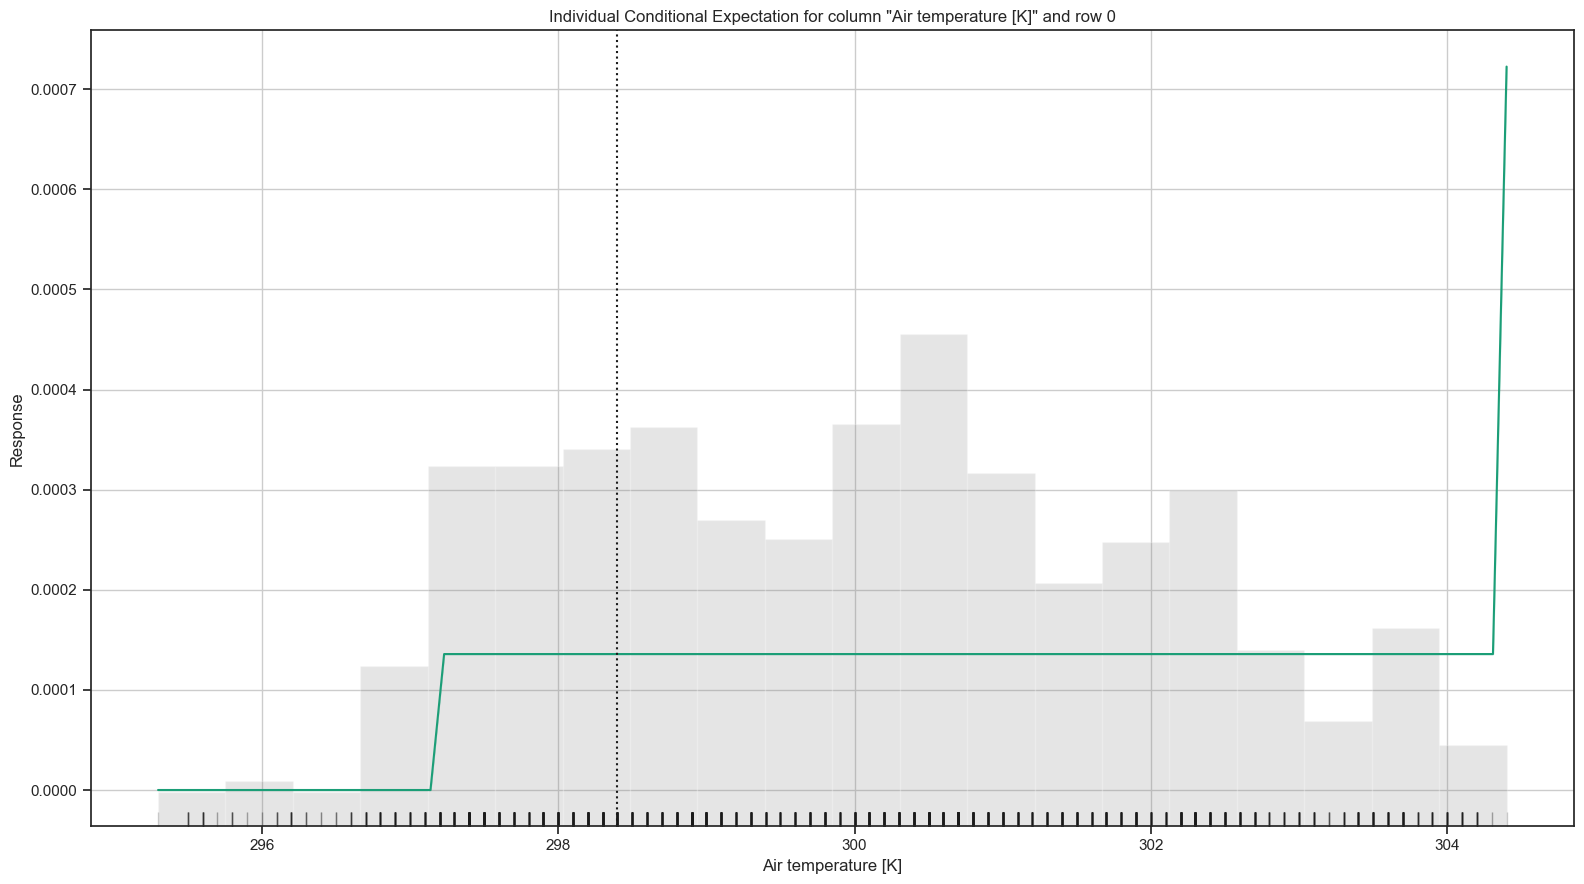

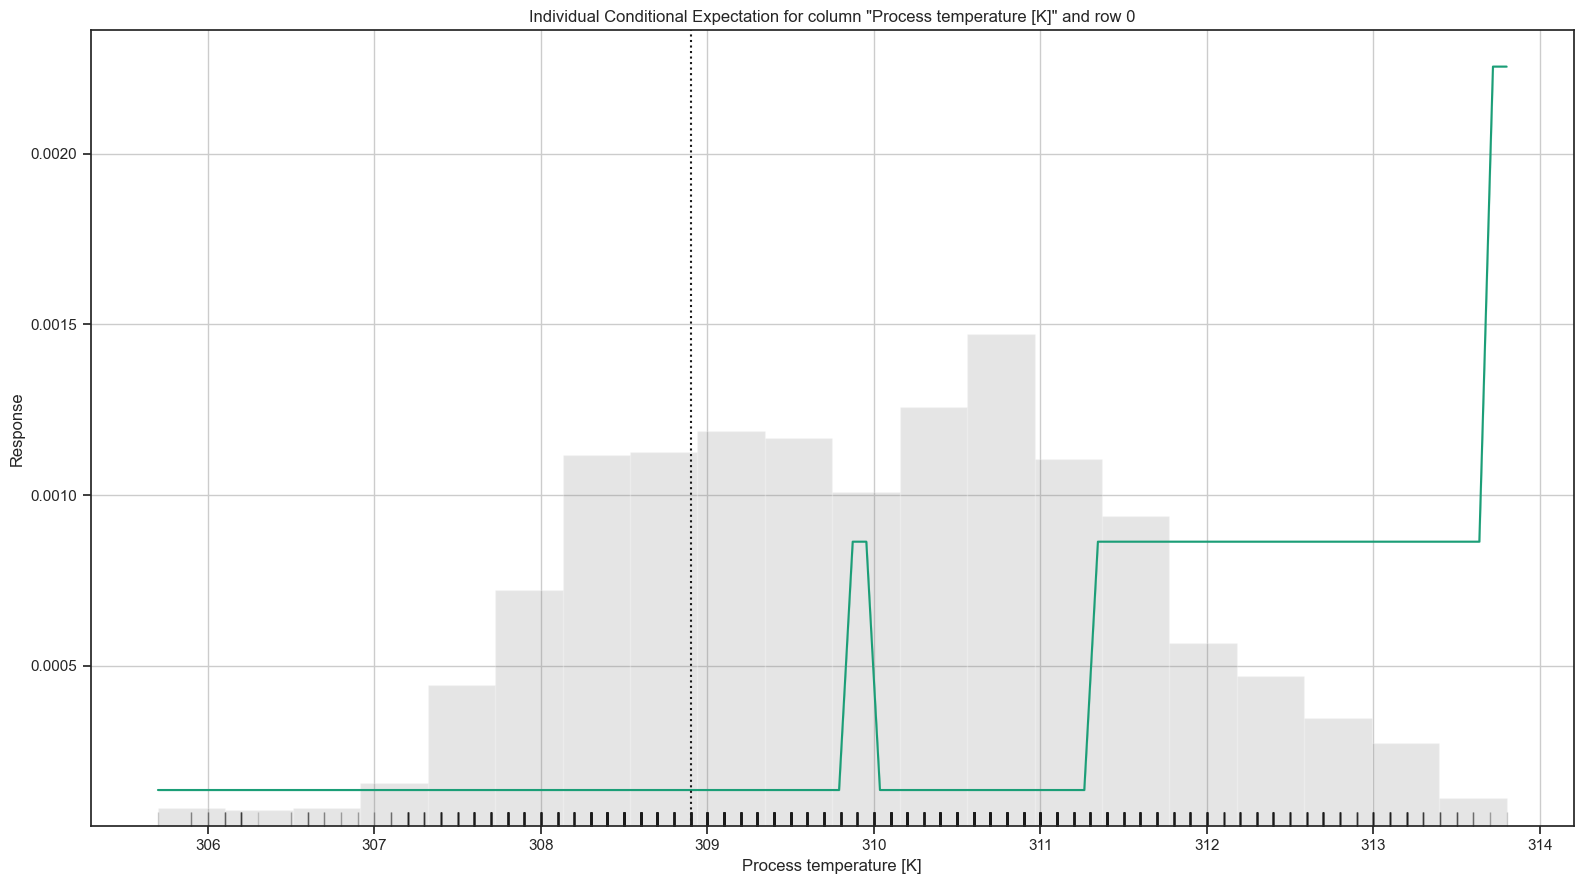

In [54]:
# Descripcion de la prediccion de un ejemplo
best_model.explain_row(test, row_index=0)

In [55]:
# Concatenar las predicciones y las etiquetas reales en un H2OFrame
performance_v2 = predictions.cbind(test['Target'])

# Mostrar el H2OFrame que contiene las predicciones y las etiquetas reales
print(performance_v2)

predict          No           Sí  Target
No         0.999864  0.000135803  No
No         1         0            No
No         1         0            No
No         1         0            No
No         1         0            No
No         1         0            No
No         1         0            No
No         1         0            No
No         0.999864  0.000135803  No
No         1         0            No
[2978 rows x 4 columns]



In [56]:
metrics = {
    'Métrica': ['MSE', 'RMSE', 'LogLoss', 'Mean Per-Class Error', 'AUC', 'AUCPR', 'Gini'],
    'Entrenamiento': [0.1353, 0.3678, 0.3743, 0.0008, 0.9998, 0.9998, 0.9997],
    'Validación Cruzada': [0.0205, 0.1431, 0.0742, 0.1820, 0.9740, 0.7574, 0.9479],
    'Prueba': [0.0172, 0.1313, 0.0625, 0.1132, 0.9802, 0.8505, 0.9605]
}

# Crear un DataFrame con las métricas
df_metrics = pd.DataFrame(metrics)

# Convertir el DataFrame a Markdown
markdown_table = df_metrics.to_markdown(index=False)

print(markdown_table)

| Métrica              |   Entrenamiento |   Validación Cruzada |   Prueba |
|:---------------------|----------------:|---------------------:|---------:|
| MSE                  |          0.1353 |               0.0205 |   0.0172 |
| RMSE                 |          0.3678 |               0.1431 |   0.1313 |
| LogLoss              |          0.3743 |               0.0742 |   0.0625 |
| Mean Per-Class Error |          0.0008 |               0.182  |   0.1132 |
| AUC                  |          0.9998 |               0.974  |   0.9802 |
| AUCPR                |          0.9998 |               0.7574 |   0.8505 |
| Gini                 |          0.9997 |               0.9479 |   0.9605 |


Análisis detallado de las métricas de rendimiento para un modelo de machine learning en las fases de entrenamiento, validación cruzada y prueba¶
MSE (Mean Squared Error): Los valores de MSE son bajos en todas las fases, lo que indica que el modelo tiene un buen ajuste. El valor más bajo en la fase de prueba (0.0172) sugiere que el modelo generaliza bien a datos no vistos.

RMSE (Root Mean Squared Error): Similar al MSE, los valores de RMSE son bajos y el más bajo en la fase de prueba (0.1313), lo que es una buena señal de la capacidad de generalización del modelo.

LogLoss (Logarithmic Loss): Esta métrica también muestra una mejora desde el entrenamiento hasta la prueba, con el valor más bajo en la prueba (0.0625), lo que indica una alta probabilidad asignada a las clases correctas.

Mean Per-Class Error: Es notablemente bajo durante el entrenamiento (0.0008) pero aumenta durante la validación cruzada y la prueba. Esto podría sugerir un sobreajuste durante el entrenamiento, aunque el error sigue siendo relativamente bajo en la prueba (0.1132).

AUC (Area Under the Curve): Los valores de AUC son muy altos en todas las fases, especialmente en el entrenamiento (0.9998), lo que indica una excelente capacidad de discriminación del modelo entre las clases.

AUCPR (Area Under the Precision-Recall Curve): Aunque hay una disminución desde el entrenamiento hasta la prueba, el valor en la prueba (0.8505) sigue siendo alto, lo que refleja una buena precisión y recuperación de las clases positivas.

Gini: El coeficiente de Gini, que es una medida de la desigualdad de la distribución (en este contexto, la desigualdad en la predicción de errores), es muy alto y mejora ligeramente en la fase de prueba (0.9605), lo que es positivo.